#### Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,recall_score, precision_score
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Functions

In [2]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [3]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [4]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

In [5]:
def rfc(X_train_rfc,X_test_rfc,y_train,max_depth):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_rfc, y_test, ax=ax, alpha=0.8)
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  return f1score, mccscore

In [6]:
def evaluate1(model, X_train,X_test,y_train,y_test):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)

  scaler = StandardScaler()
  scaler.fit(X_train)
  train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  #print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
  print("Train Accuracy Score:", accuracy_score(y_train, model.predict(X_train)))
  print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])
  sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
  FNR = cm[1,0]/(cm[1,0]+cm[0,0])
  FPR = cm[0,1]/(cm[0,1]+cm[1,1])
  specificity1 = 1 - FPR
  sensitivity1 = 1- FNR
  print("F1 Score:", f1score) 
  print("MC Score:" , mccscore)
  print("Sensitivity:" , sensitivity)
  print("Specificity:" , specificity)
  print("Recall:" , recall)
  print("Precision:" , precision)
  print("FNR:" , FNR)
  print("FPR:" , FPR)
  #print("Sensitivity1:" , sensitivity1)
  #print("Specificity1:" , specificity1)
  sns.heatmap(cm, annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])


In [7]:
def evaluate2(model, X_train,X_test,y_train,y_test):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  model.fit(X_train_std, y_train)
  y_pred = model.predict(X_test_std)
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  #print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_std, y_test, ax=ax, alpha=0.8)
  print("Model Name:", model)
  print("Train Accuracy Score:", accuracy_score(y_train, model.predict(X_train_std)))
  print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])
  sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
  FNR = cm[1,0]/(cm[1,0]+cm[0,0])
  FPR = cm[0,1]/(cm[0,1]+cm[1,1])
  specificity1 = 1 - FPR
  sensitivity1 = 1- FNR
  print("F1 Score:", f1score) 
  print("MC Score:" , mccscore)
  print("Sensitivity:" , sensitivity)
  print("Specificity:" , specificity)
  print("Recall:" , recall)
  print("Precision:" , precision)
  print("FNR:" , FNR)
  print(f"FPR: {FPR}\n" )
  #print("Sensitivity1:" , sensitivity1)
  #print("Specificity1:" , specificity1)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
def evaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    logreg.fit(train_std, train_target.values.ravel())
    
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(logreg, classes=['Fail', 'Pass'], cmap="YlGn", size=(400,400))
    cm.score(test_std, y_true)
    cm.show()
    from matplotlib.pyplot import figure
    figure(figsize=(5, 5), dpi=80)
    ax = plt.gca()
    plot = plot_roc_curve(logreg, test_df, test_target, ax=ax, alpha=0.8)
    
    return f1score, mccscore

#### Importing and basic cleaning

In [9]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [10]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [11]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [12]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [13]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [14]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [15]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [16]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [17]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [18]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.20, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [20]:
X_test_original = X_test

#### Re-labeling the Target values


In [21]:
# # Relabeling target variables 1 is pass and 0 is fail
# y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
# y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [22]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision : Removing columns with more that 50% missing values

In [23]:
X_train.shape

(1253, 590)

In [24]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.shape

# Features deleted with more than 0.5 % missing values 32


(1253, 558)

## Removing Unique cols

In [25]:
# X_train_unique = X_train_missing
# unique_remove(X_train_unique)
# X_train_unique.shape

In [26]:
# From test set deleting columns that are removed in training set
X_test_missing = X_test[np.array(X_train_missing.columns)]
X_test_missing.shape

(314, 558)

# Decision : Replacing outliers with 3s boundary

##### Other option of removing outliers and replacing them has been explored in file "Base file - removing outliers and replacing with knn.ipynb"

In [27]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

In [28]:
# replace with 3s in X_train
for col in X_train_missing.columns:
    mean = X_train_missing[col].mean()
    std_dev = X_train_missing[col].std(axis=0)
    X_train_missing[col] = X_train_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [29]:
# replace with 3s in X_test
for col in X_test_missing.columns:
    mean = X_test_missing[col].mean()
    std_dev = X_test_missing[col].std(axis=0)
    X_test_missing[col] = X_test_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

# KNN Imputation

In [30]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_missing)
X_train_knn=pd.DataFrame(knn.transform(X_train_missing), columns=X_train_missing.columns)
X_train_knn.isna().sum().sum()

0

In [31]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_missing)
X_test_knn=pd.DataFrame(knn.transform(X_test_missing), columns=X_test_missing.columns)
X_test_knn.isna().sum().sum()

0

# Feature Reduction

In [33]:
from sklearn.decomposition import PCA


In [42]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_train_knn)

Covariance Matrix 
 [[ 2.66733554e-02 -3.95117885e-03 -9.46666037e-05 ... -1.47920952e-04
  -2.13283715e-04 -4.99908574e-04]
 [-3.95117885e-03  2.59173778e-02 -3.37753581e-05 ...  1.21761031e-03
   9.96881327e-04  1.32643074e-03]
 [-9.46666037e-05 -3.37753581e-05  2.52404304e-02 ... -9.11869555e-04
  -9.61831917e-04 -7.85140997e-04]
 ...
 [-1.47920952e-04  1.21761031e-03 -9.11869555e-04 ...  4.03022745e-02
   3.96412802e-02  1.88898919e-02]
 [-2.13283715e-04  9.96881327e-04 -9.61831917e-04 ...  3.96412802e-02
   4.13419598e-02  1.89866390e-02]
 [-4.99908574e-04  1.32643074e-03 -7.85140997e-04 ...  1.88898919e-02
   1.89866390e-02  4.57724148e-02]]
Cumulative Variance Explained [  4.51343279   7.44229511  10.30476039  12.68284722  14.93071216
  16.93353085  18.86611132  20.70906778  22.49583947  24.27270243
  25.9520711   27.59390042  29.10651723  30.60423721  31.9513873
  33.28470809  34.60644904  35.85915171  37.06084738  38.21680205
  39.34120268  40.40966728  41.47218165  42.5124923

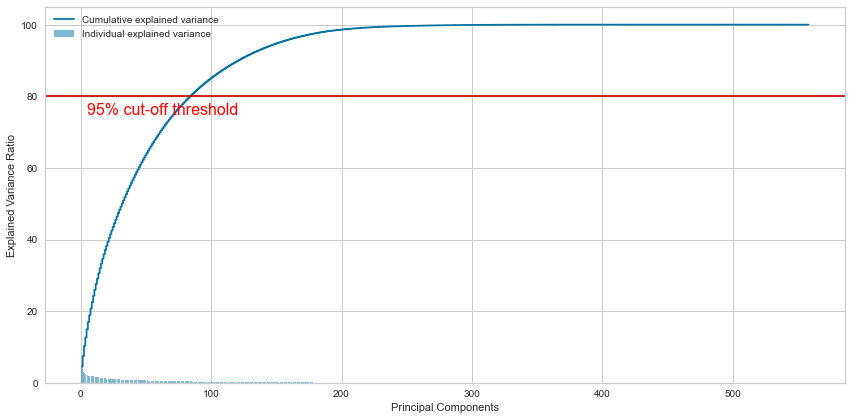

           0         1         2         3         4         5         6    \
0    -1.001916 -0.434747  0.410228  0.302756  0.138977 -0.359300 -0.397264   
1     0.633797 -0.315550 -0.056456  0.783592  0.019845  0.527253  0.410460   
2     0.658469  0.695879 -0.325306 -0.629954  0.014590 -0.452506 -1.102288   
3    -0.367391 -0.421918 -0.745089 -0.192463 -0.147671  0.238885  0.541369   
4    -0.056925 -0.152153  0.016012 -0.398454  0.550041 -0.680776 -0.179195   
...        ...       ...       ...       ...       ...       ...       ...   
1248  0.466037 -0.542663  0.606457 -0.181959 -0.105419 -0.771912  0.920215   
1249 -0.195788 -0.217461 -0.655253 -0.044694 -0.054175  0.408073 -0.414595   
1250  0.366997  0.194959 -0.511826  0.294452  0.381747 -0.026352 -0.394044   
1251  0.586099 -0.554699  0.121774  0.923534  0.129133 -0.255351 -1.295388   
1252 -0.209878  0.785794  0.106031 -1.473795 -0.469132 -0.002388  0.489952   

           7         8         9    ...       111       112    

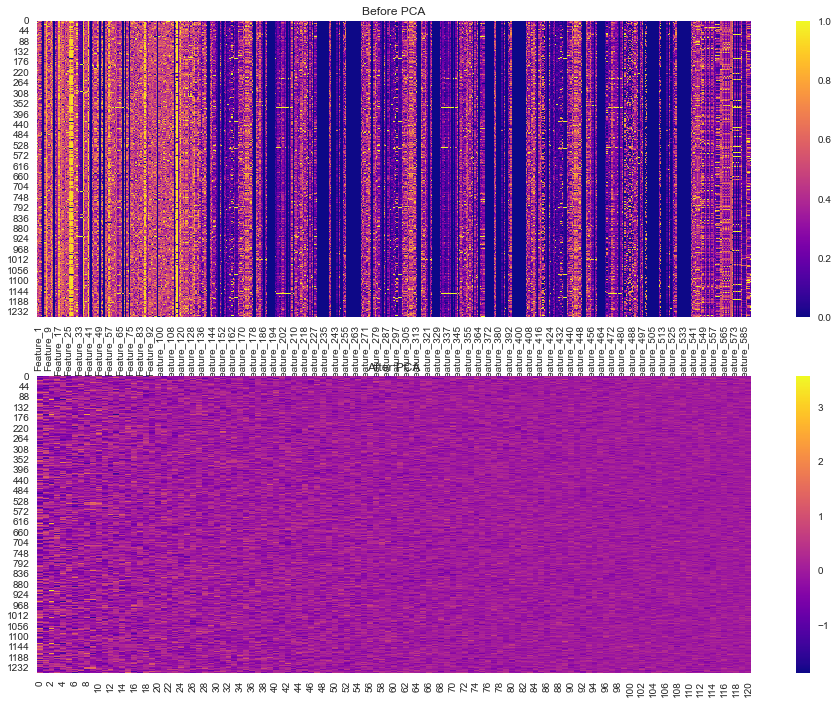

In [47]:
from sklearn.preprocessing import MinMaxScaler
col=list(X_train_knn.columns)
col1=list(X_test_knn.columns)
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(X_train_knn)
scaled_feature = pd.DataFrame(scaled_feature,columns=col)

from sklearn.decomposition import PCA
import numpy as np
# Creating a covariance matrix

cov_matrix = np.cov(scaled_feature.T)
print('Covariance Matrix \n', cov_matrix)
      
#perform an eigendecomposition on the covariance matrix:

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)  


tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)



plt.figure(figsize=(12 ,6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.axhline(y=80, color='r', linestyle='-')
plt.text(5, 75, '95% cut-off threshold', color = 'red', fontsize=16)
plt.tight_layout()
plt.show()  


pca = PCA(n_components=scaled_feature.shape[1],random_state=1).fit(scaled_feature.values)
a = np.cumsum(pca.explained_variance_ratio_)


i = 0
while a[i] < 0.9:
    i = i+1
f'Number of dimensions needed to capture 90%% of variance:{i}'


# PCA with reduced number of components

pca = PCA(n_components=i,random_state=1)
pca.fit(scaled_feature)
#print(pca.components_)

pca_df= pd.DataFrame(pca.fit_transform(scaled_feature))
print(pca_df)


pca_df.shape

#heatmap before and after PCA
# after PCA shows that the components are in the acceptable range of colinearity: means that the components are independent and  suitable for model making.
f, (ax_heatmap, ax_heatmap2) = plt.subplots(2,figsize=(16,12))
ax_heatmap.set_title('Before PCA')
ax_heatmap2.set_title('After PCA')

sns.heatmap(scaled_feature,ax=ax_heatmap,cmap='plasma');
sns.heatmap(pca_df,ax=ax_heatmap2,cmap='plasma');


from sklearn.decomposition import PCA
# create a PCA object
pca = PCA(n_components = i)# extracted features we want to end up within our new dataset(2).
# Apply the above object to our training dataset using the fit method.
X_train = pca.fit_transform(X_train_knn)
# Apply the PCA object to the test set only to transform this set
X_test = pca.fit_transform(X_test_knn)